## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9827229	total: 58.8ms	remaining: 58.8s
1:	learn: 0.9647651	total: 59.9ms	remaining: 29.9s
2:	learn: 0.9433275	total: 60.8ms	remaining: 20.2s
3:	learn: 0.9262241	total: 61.9ms	remaining: 15.4s
4:	learn: 0.9083458	total: 63.2ms	remaining: 12.6s
5:	learn: 0.8914330	total: 64.1ms	remaining: 10.6s
6:	learn: 0.8744394	total: 65.1ms	remaining: 9.24s
7:	learn: 0.8592181	total: 66.1ms	remaining: 8.2s
8:	learn: 0.8446130	total: 67.1ms	remaining: 7.39s
9:	learn: 0.8278388	total: 68.1ms	remaining: 6.74s
10:	learn: 0.8147559	total: 68.9ms	remaining: 6.2s
11:	learn: 0.8011755	total: 69.8ms	remaining: 5.75s
12:	learn: 0.7865913	total: 70.6ms	remaining: 5.36s
13:	learn: 0.7711973	total: 71.5ms	remaining: 5.03s
14:	learn: 0.7588452	total: 72.3ms	remaining: 4.75s
15:	learn: 0.7449324	total: 73.2ms	remaining: 4.5s
16:	learn: 0.7323717	total: 74ms	remaining: 4.28s
17:	learn: 0.7195147	total: 74.8ms	remaining: 4.08s
18:	learn: 0.7079241	total: 75.6ms	remaining: 3.9

58:	learn: 0.4239862	total: 110ms	remaining: 1.75s
59:	learn: 0.4204745	total: 111ms	remaining: 1.73s
60:	learn: 0.4162064	total: 112ms	remaining: 1.72s
61:	learn: 0.4121441	total: 112ms	remaining: 1.7s
62:	learn: 0.4084314	total: 113ms	remaining: 1.69s
63:	learn: 0.4047033	total: 114ms	remaining: 1.67s
64:	learn: 0.4016576	total: 115ms	remaining: 1.66s
65:	learn: 0.3991050	total: 116ms	remaining: 1.64s
66:	learn: 0.3954730	total: 117ms	remaining: 1.63s
67:	learn: 0.3918170	total: 118ms	remaining: 1.62s
68:	learn: 0.3892931	total: 119ms	remaining: 1.6s
69:	learn: 0.3868744	total: 120ms	remaining: 1.59s
70:	learn: 0.3830902	total: 121ms	remaining: 1.58s
71:	learn: 0.3807775	total: 122ms	remaining: 1.57s
72:	learn: 0.3774863	total: 123ms	remaining: 1.56s
73:	learn: 0.3744661	total: 124ms	remaining: 1.55s
74:	learn: 0.3713657	total: 125ms	remaining: 1.54s
75:	learn: 0.3681157	total: 125ms	remaining: 1.52s
76:	learn: 0.3643092	total: 126ms	remaining: 1.51s
77:	learn: 0.3622557	total: 127ms

148:	learn: 0.2613065	total: 192ms	remaining: 1.1s
149:	learn: 0.2604358	total: 193ms	remaining: 1.09s
150:	learn: 0.2593882	total: 194ms	remaining: 1.09s
151:	learn: 0.2583194	total: 194ms	remaining: 1.08s
152:	learn: 0.2575200	total: 195ms	remaining: 1.08s
153:	learn: 0.2568216	total: 196ms	remaining: 1.08s
154:	learn: 0.2557766	total: 197ms	remaining: 1.07s
155:	learn: 0.2551822	total: 198ms	remaining: 1.07s
156:	learn: 0.2542418	total: 199ms	remaining: 1.07s
157:	learn: 0.2533859	total: 200ms	remaining: 1.06s
158:	learn: 0.2526565	total: 200ms	remaining: 1.06s
159:	learn: 0.2518774	total: 201ms	remaining: 1.06s
160:	learn: 0.2511165	total: 202ms	remaining: 1.05s
161:	learn: 0.2502763	total: 203ms	remaining: 1.05s
162:	learn: 0.2495682	total: 204ms	remaining: 1.05s
163:	learn: 0.2487046	total: 205ms	remaining: 1.04s
164:	learn: 0.2477864	total: 206ms	remaining: 1.04s
165:	learn: 0.2469556	total: 206ms	remaining: 1.04s
166:	learn: 0.2461498	total: 207ms	remaining: 1.03s
167:	learn: 0

268:	learn: 0.1895152	total: 300ms	remaining: 815ms
269:	learn: 0.1893165	total: 301ms	remaining: 814ms
270:	learn: 0.1888867	total: 302ms	remaining: 813ms
271:	learn: 0.1887505	total: 303ms	remaining: 811ms
272:	learn: 0.1884758	total: 304ms	remaining: 810ms
273:	learn: 0.1881622	total: 305ms	remaining: 808ms
274:	learn: 0.1877375	total: 306ms	remaining: 807ms
275:	learn: 0.1872463	total: 307ms	remaining: 805ms
276:	learn: 0.1868264	total: 308ms	remaining: 803ms
277:	learn: 0.1862225	total: 308ms	remaining: 801ms
278:	learn: 0.1858428	total: 309ms	remaining: 799ms
279:	learn: 0.1854889	total: 310ms	remaining: 797ms
280:	learn: 0.1849597	total: 311ms	remaining: 797ms
281:	learn: 0.1845959	total: 312ms	remaining: 795ms
282:	learn: 0.1844603	total: 313ms	remaining: 793ms
283:	learn: 0.1840062	total: 314ms	remaining: 792ms
284:	learn: 0.1838515	total: 315ms	remaining: 790ms
285:	learn: 0.1833297	total: 316ms	remaining: 789ms
286:	learn: 0.1829549	total: 317ms	remaining: 787ms
287:	learn: 

361:	learn: 0.1577519	total: 383ms	remaining: 675ms
362:	learn: 0.1575831	total: 384ms	remaining: 674ms
363:	learn: 0.1574935	total: 385ms	remaining: 673ms
364:	learn: 0.1570232	total: 386ms	remaining: 671ms
365:	learn: 0.1566595	total: 387ms	remaining: 670ms
366:	learn: 0.1563385	total: 388ms	remaining: 668ms
367:	learn: 0.1559433	total: 388ms	remaining: 667ms
368:	learn: 0.1556080	total: 389ms	remaining: 666ms
369:	learn: 0.1554191	total: 390ms	remaining: 664ms
370:	learn: 0.1551976	total: 391ms	remaining: 663ms
371:	learn: 0.1549274	total: 392ms	remaining: 661ms
372:	learn: 0.1546034	total: 393ms	remaining: 660ms
373:	learn: 0.1545168	total: 393ms	remaining: 659ms
374:	learn: 0.1544223	total: 394ms	remaining: 657ms
375:	learn: 0.1543747	total: 395ms	remaining: 656ms
376:	learn: 0.1541575	total: 396ms	remaining: 655ms
377:	learn: 0.1540263	total: 397ms	remaining: 653ms
378:	learn: 0.1536675	total: 398ms	remaining: 652ms
379:	learn: 0.1535332	total: 399ms	remaining: 650ms
380:	learn: 

484:	learn: 0.1296780	total: 491ms	remaining: 522ms
485:	learn: 0.1294820	total: 493ms	remaining: 521ms
486:	learn: 0.1292769	total: 493ms	remaining: 520ms
487:	learn: 0.1292208	total: 494ms	remaining: 519ms
488:	learn: 0.1291148	total: 495ms	remaining: 518ms
489:	learn: 0.1289516	total: 496ms	remaining: 516ms
490:	learn: 0.1286954	total: 497ms	remaining: 515ms
491:	learn: 0.1286231	total: 498ms	remaining: 514ms
492:	learn: 0.1283295	total: 499ms	remaining: 513ms
493:	learn: 0.1281734	total: 500ms	remaining: 512ms
494:	learn: 0.1278908	total: 500ms	remaining: 511ms
495:	learn: 0.1278357	total: 501ms	remaining: 509ms
496:	learn: 0.1275790	total: 502ms	remaining: 508ms
497:	learn: 0.1273692	total: 503ms	remaining: 507ms
498:	learn: 0.1272317	total: 504ms	remaining: 506ms
499:	learn: 0.1270463	total: 505ms	remaining: 505ms
500:	learn: 0.1270025	total: 506ms	remaining: 504ms
501:	learn: 0.1267310	total: 507ms	remaining: 503ms
502:	learn: 0.1265853	total: 508ms	remaining: 501ms
503:	learn: 

577:	learn: 0.1128166	total: 575ms	remaining: 420ms
578:	learn: 0.1127663	total: 576ms	remaining: 419ms
579:	learn: 0.1126759	total: 577ms	remaining: 418ms
580:	learn: 0.1124248	total: 578ms	remaining: 416ms
581:	learn: 0.1123202	total: 578ms	remaining: 415ms
582:	learn: 0.1119858	total: 579ms	remaining: 414ms
583:	learn: 0.1118354	total: 580ms	remaining: 413ms
584:	learn: 0.1115966	total: 581ms	remaining: 412ms
585:	learn: 0.1114057	total: 582ms	remaining: 411ms
586:	learn: 0.1112140	total: 583ms	remaining: 411ms
587:	learn: 0.1110504	total: 584ms	remaining: 409ms
588:	learn: 0.1108729	total: 585ms	remaining: 408ms
589:	learn: 0.1107611	total: 586ms	remaining: 407ms
590:	learn: 0.1106395	total: 587ms	remaining: 406ms
591:	learn: 0.1104059	total: 588ms	remaining: 405ms
592:	learn: 0.1102783	total: 588ms	remaining: 404ms
593:	learn: 0.1101317	total: 589ms	remaining: 403ms
594:	learn: 0.1101164	total: 590ms	remaining: 402ms
595:	learn: 0.1100458	total: 591ms	remaining: 401ms
596:	learn: 

698:	learn: 0.0949528	total: 683ms	remaining: 294ms
699:	learn: 0.0948715	total: 684ms	remaining: 293ms
700:	learn: 0.0947018	total: 685ms	remaining: 292ms
701:	learn: 0.0946829	total: 686ms	remaining: 291ms
702:	learn: 0.0946056	total: 687ms	remaining: 290ms
703:	learn: 0.0944618	total: 688ms	remaining: 289ms
704:	learn: 0.0942898	total: 688ms	remaining: 288ms
705:	learn: 0.0941521	total: 689ms	remaining: 287ms
706:	learn: 0.0940127	total: 690ms	remaining: 286ms
707:	learn: 0.0938792	total: 691ms	remaining: 285ms
708:	learn: 0.0937895	total: 692ms	remaining: 284ms
709:	learn: 0.0936331	total: 692ms	remaining: 283ms
710:	learn: 0.0935646	total: 693ms	remaining: 282ms
711:	learn: 0.0933496	total: 694ms	remaining: 281ms
712:	learn: 0.0931668	total: 695ms	remaining: 280ms
713:	learn: 0.0930217	total: 696ms	remaining: 279ms
714:	learn: 0.0928669	total: 697ms	remaining: 278ms
715:	learn: 0.0927029	total: 698ms	remaining: 277ms
716:	learn: 0.0926805	total: 699ms	remaining: 276ms
717:	learn: 

793:	learn: 0.0837445	total: 766ms	remaining: 199ms
794:	learn: 0.0836216	total: 767ms	remaining: 198ms
795:	learn: 0.0834736	total: 767ms	remaining: 197ms
796:	learn: 0.0833603	total: 768ms	remaining: 196ms
797:	learn: 0.0832055	total: 769ms	remaining: 195ms
798:	learn: 0.0830690	total: 770ms	remaining: 194ms
799:	learn: 0.0829379	total: 771ms	remaining: 193ms
800:	learn: 0.0828009	total: 772ms	remaining: 192ms
801:	learn: 0.0826561	total: 773ms	remaining: 191ms
802:	learn: 0.0825409	total: 774ms	remaining: 190ms
803:	learn: 0.0824029	total: 774ms	remaining: 189ms
804:	learn: 0.0823149	total: 775ms	remaining: 188ms
805:	learn: 0.0821265	total: 776ms	remaining: 187ms
806:	learn: 0.0819760	total: 777ms	remaining: 186ms
807:	learn: 0.0817656	total: 778ms	remaining: 185ms
808:	learn: 0.0816653	total: 779ms	remaining: 184ms
809:	learn: 0.0815340	total: 780ms	remaining: 183ms
810:	learn: 0.0813495	total: 781ms	remaining: 182ms
811:	learn: 0.0811408	total: 782ms	remaining: 181ms
812:	learn: 

917:	learn: 0.0698521	total: 874ms	remaining: 78.1ms
918:	learn: 0.0697376	total: 875ms	remaining: 77.1ms
919:	learn: 0.0696356	total: 876ms	remaining: 76.2ms
920:	learn: 0.0694831	total: 877ms	remaining: 75.2ms
921:	learn: 0.0694525	total: 878ms	remaining: 74.3ms
922:	learn: 0.0693636	total: 879ms	remaining: 73.3ms
923:	learn: 0.0692801	total: 880ms	remaining: 72.3ms
924:	learn: 0.0692542	total: 881ms	remaining: 71.4ms
925:	learn: 0.0691625	total: 881ms	remaining: 70.4ms
926:	learn: 0.0690363	total: 882ms	remaining: 69.5ms
927:	learn: 0.0688993	total: 883ms	remaining: 68.5ms
928:	learn: 0.0688039	total: 884ms	remaining: 67.6ms
929:	learn: 0.0687245	total: 885ms	remaining: 66.6ms
930:	learn: 0.0686124	total: 886ms	remaining: 65.7ms
931:	learn: 0.0685052	total: 887ms	remaining: 64.8ms
932:	learn: 0.0684150	total: 888ms	remaining: 63.8ms
933:	learn: 0.0683873	total: 889ms	remaining: 62.8ms
934:	learn: 0.0683269	total: 890ms	remaining: 61.9ms
935:	learn: 0.0681634	total: 891ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

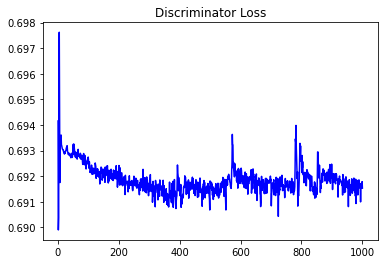

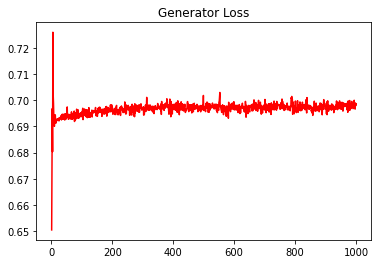

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.0801874238804021


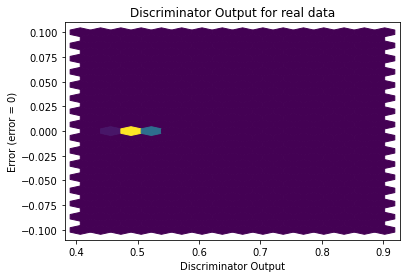

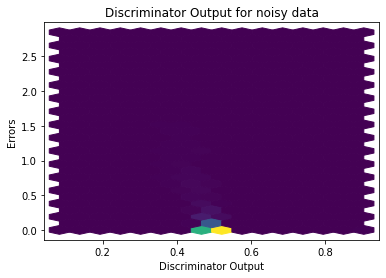

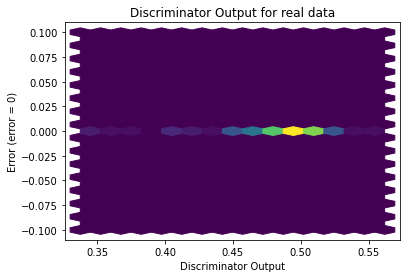

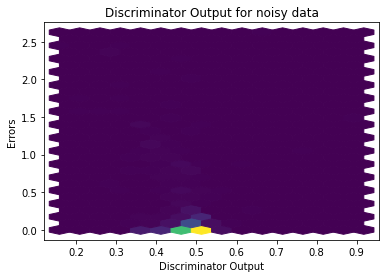

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


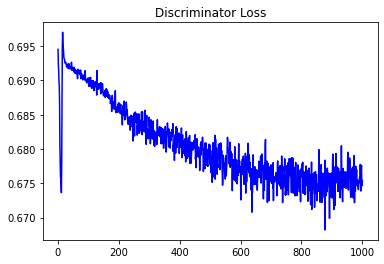

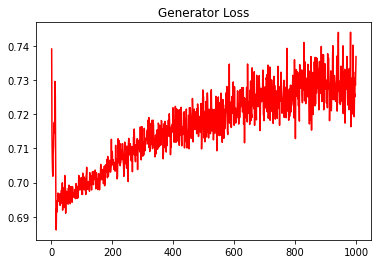

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.0869559969885714


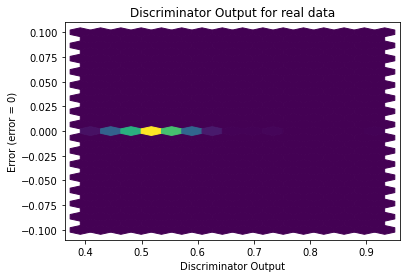

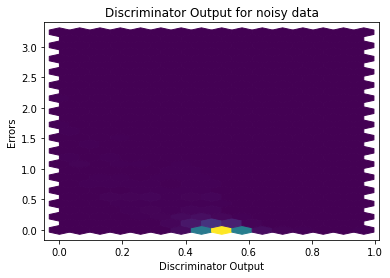

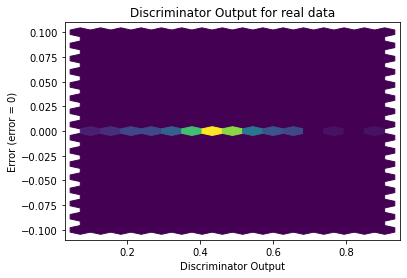

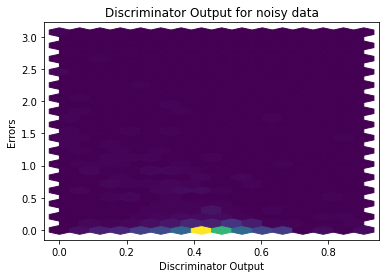

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.5139]], requires_grad=True)
